# Exploratory Analysis of Bike Share Data

Can I make the assumption that the data covers all transactions?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data
data = pd.read_csv('./data/metro-bike-share-trip-data.csv')

C:\Users\grant\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."


In [4]:
print(data.columns)
print('Number of vars: ' + str(len(data.columns)))
print('Number of transactions: ' + str(len(data.index)))

Index(['Trip ID', 'Duration', 'Start Time', 'End Time', 'Starting Station ID',
       'Starting Station Latitude', 'Starting Station Longitude',
       'Ending Station ID', 'Ending Station Latitude',
       'Ending Station Longitude', 'Bike ID', 'Plan Duration',
       'Trip Route Category', 'Passholder Type', 'Starting Lat-Long',
       'Ending Lat-Long'],
      dtype='object')
Number of vars: 16
Number of transactions: 132427


## Stations

In [5]:
# how many unique stations are there?
data['Starting Station ID'].nunique()

67

Last two columns seem kind of redundant.

In [17]:
station_counts = data.groupby('Starting Station ID').size().reset_index(name="counts")
print("Bpttom STATIONS")
print(station_counts.sort_values('counts', ascending=True).head())
print()
print("Top STATIONS")
print(station_counts.sort_values('counts', ascending=False).head())

Bpttom STATIONS
    Starting Station ID  counts
41               3053.0      13
0                3000.0      29
5                3009.0      56
66               4108.0     108
31               3039.0     115

Top STATIONS
    Starting Station ID  counts
56               3069.0    5138
22               3030.0    5059
1                3005.0    4883
51               3064.0    4661
23               3031.0    4629


In [18]:
top = station_counts.sort_values('counts', ascending=True).head()
bottom = station_counts.sort_values('counts', ascending=False).head()

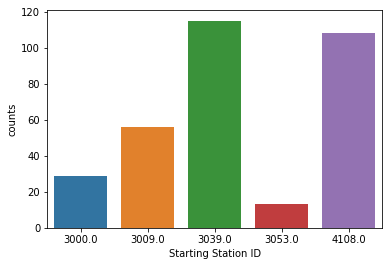

In [19]:
sns.barplot(data=top, x='Starting Station ID', y='counts')


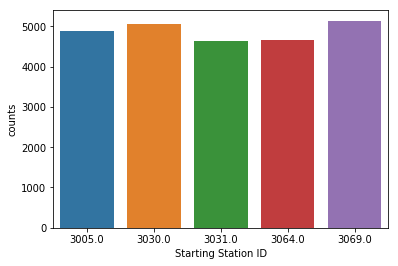

In [20]:
sns.barplot(data=bottom, x='Starting Station ID', y='counts')

So the range in station usage can very a lot. For training models, convert the destination var into one-hot model?

### Generating Station Objects

In [7]:
station_counts = data.groupby('Starting Station ID').agg('mean')
station_counts['Starting Station ID'] = station_counts.index
station_cols = ['Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude']
unique_stations = station_counts[station_cols].dropna()
display(unique_stations.head())


print('Station JavaScript Object:')
print('[')
for index, station in unique_stations.iterrows():
    print('\t{')
    print('\t\tid: {},'. format(int(station['Starting Station ID'])))
    print('\t\tposition: {{lat: {}, lng: {}}}'.format(station['Starting Station Latitude'], station['Starting Station Longitude']))
    print('\t},')
print(']')


,Starting Station ID,Starting Station Latitude,Starting Station Longitude
Starting Station ID,,,
3005.0,3005.0,34.048550,-118.259049
3006.0,3006.0,34.045540,-118.256669
3007.0,3007.0,34.050480,-118.254592
3008.0,3008.0,34.046612,-118.262732
3009.0,3009.0,33.987381,-118.472832


Station JavaScript Object:
[
	{
		id: 3005,
		position: {lat: 34.04854988302644, lng: -118.25904877983515}
	},
	{
		id: 3006,
		position: {lat: 34.04553995136754, lng: -118.25666897267321}
	},
	{
		id: 3007,
		position: {lat: 34.05047996057554, lng: -118.25459181722862}
	},
	{
		id: 3008,
		position: {lat: 34.04661191456394, lng: -118.26273171846543}
	},
	{
		id: 3009,
		position: {lat: 33.98738099999997, lng: -118.47283200000012}
	},
	{
		id: 3010,
		position: {lat: 34.03704815667448, lng: -118.25486904449798}
	},
	{
		id: 3011,
		position: {lat: 34.04113003635652, lng: -118.26798127287235}
	},
	{
		id: 3014,
		position: {lat: 34.0566100449573, lng: -118.23721165128431}
	},
	{
		id: 3016,
		position: {lat: 34.052898193344554, lng: -118.24156103328538}
	},
	{
		id: 3018,
		position: {lat: 34.04373185854561, lng: -118.26013947151228}
	},
	{
		id: 3019,
		position: {lat: 34.038608820734325, lng: -118.26085834449653}
	},
	{
		id: 3020,
		position: {lat: 34.0310518401515, lng: -118.2670900

## Plan Characteristics

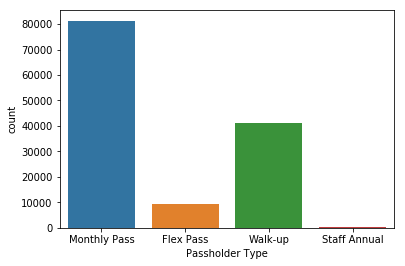

In [8]:
sns.countplot(data=data, x='Passholder Type')

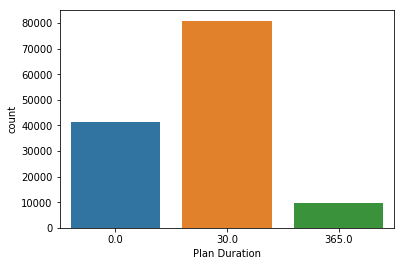

In [9]:
sns.countplot(data=data, x='Plan Duration')

It would be interesting to see how these two features interact. Do walk-ups (plan duration 0) a large population of users?

## Trip Characteristics

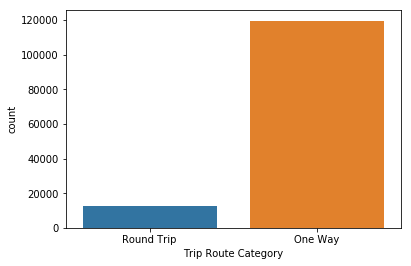

In [10]:
sns.countplot(data=data, x='Trip Route Category')

Potential feature for deciding whether bike will return to starting point.

## Timing

What kind of users spend the most time riding? I'm assuming we want to target those who ride for a long time and frequently. Is that the same population? How does time of year, time of day change riding habits?

## Graphs, Multiple Vars

## Possible Ideas

A simulation where the user can place bikes onto a map and using models trained from the bike share dataset, we can model how the bikes move between stations over time.